# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [4]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
                                    'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
                                    'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,idm_r_MIN,idm_r_MAX,idm_r_MEAN,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.018896,0.384033,0.057680,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,8.189,9.622,2005,818,0.59,2.92,2.47,0.020510,0.262630,0.056071,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,8.380,9.589,2001,818,0.78,2.88,2.44,0.021948,0.146006,0.054125,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,8.137,9.449,2040,833,0.52,2.72,2.55,0.019093,0.366594,0.059043,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,7.696,9.401,1758,717,0.22,2.83,2.14,0.016348,0.295941,0.056370,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# Pre-analysis of parameters

In [5]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   idm_r_MIN      103 non-null    float64
 8   idm_r_MAX      103 non-null    float64
 9   idm_r_MEAN     103 non-null    float64
 10  idm_r_STD      103 non-null    float64
 11  idm_r_Q25      103 non-null    float64
 12  idm_r_Q50      103 non-null    float64
 13  idm_r_Q75      103 non-null    float64
 14  idm_g_MIN      103 non-null    float64
 15  idm_g_MAX      103 non-null    float64
 16  idm_g_MEAN     103 non-null    float64
 17  idm_g_STD      103 non-null    float64
 18  idm_g_Q25 

In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_23659/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [7]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,idm_r_MIN,idm_r_MAX,idm_r_MEAN,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,0.018784,0.361270,0.062383,...,0.043780,0.053322,0.068210,0.018715,0.369862,0.063183,0.031414,0.045112,0.054775,0.070020
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,0.004371,0.159418,0.013583,...,0.009554,0.011977,0.016121,0.004613,0.167070,0.013391,0.014380,0.009520,0.011976,0.016240
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,0.011770,0.116429,0.045291,...,0.032426,0.038965,0.048217,0.010157,0.119180,0.044884,0.011541,0.032628,0.038965,0.048217
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.016082,0.229642,0.053289,...,0.038160,0.045851,0.057399,0.015803,0.235651,0.054792,0.019469,0.039603,0.047617,0.058939
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.017919,0.326403,0.057774,...,0.041431,0.050218,0.062863,0.017749,0.329936,0.059749,0.029068,0.042930,0.051569,0.065442
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,0.020262,0.453982,0.066262,...,0.044375,0.055068,0.074153,0.020328,0.487015,0.068365,0.037530,0.046268,0.056588,0.075429
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,0.036265,0.748390,0.109070,...,0.084755,0.100882,0.123452,0.041025,0.770000,0.107732,0.075240,0.087202,0.104570,0.124853


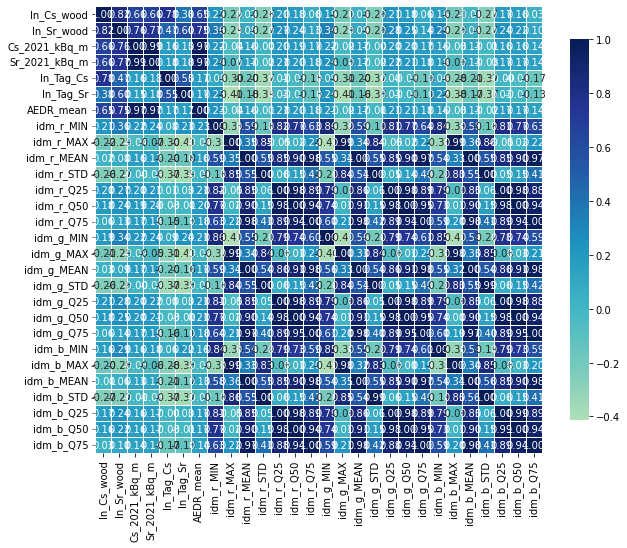

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
                                   'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
                                   'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Sr'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [11]:
# Columns in "X" data collections
X.head()

,idm_r_MIN,idm_r_MAX,idm_r_MEAN,idm_r_STD,idm_r_Q25,idm_r_Q50,idm_r_Q75,idm_g_MIN,idm_g_MAX,idm_g_MEAN,...,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75,Random1,Random2,Random3,Random4,Random5
0,0.018896,0.384033,0.057680,0.029676,0.041920,0.050301,0.062238,0.013972,0.376060,0.057730,...,0.059749,0.030217,0.043539,0.052312,0.064544,10.057839,13.071204,8.304687,8.069800,10.358930
1,0.020510,0.262630,0.056071,0.025267,0.042133,0.049856,0.061412,0.018636,0.289322,0.055371,...,0.057223,0.025515,0.043035,0.050941,0.062608,12.874724,10.174735,8.388717,6.937656,9.070645
2,0.021948,0.146006,0.054125,0.015072,0.043877,0.051675,0.061436,0.021988,0.170117,0.053174,...,0.056571,0.016629,0.045142,0.053495,0.064635,8.582575,8.877218,10.946305,9.955071,8.496231
3,0.019093,0.366594,0.059043,0.022897,0.044932,0.054252,0.067136,0.015969,0.348899,0.058043,...,0.060880,0.023964,0.046111,0.055601,0.069182,12.074614,11.324907,9.215163,11.714106,8.489347
4,0.016348,0.295941,0.056370,0.023413,0.042199,0.050681,0.063448,0.017970,0.280073,0.054908,...,0.057902,0.024283,0.043045,0.051566,0.065078,10.005146,6.733957,8.481818,10.816694,13.049818


In [12]:
# Columns in "y" data collections
y.head()

,ln_Tag_Sr
0,2.58
1,2.92
2,2.88
3,2.72
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.04544828658684097, 0.02705512155161971, -0.13280549849935608]
    Mean: -0.020
    Std: 0.080

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.91945665 0.93023728 0.98017542]
    Mean: 0.943
    Std: 0.026

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7247036871228899, 0.8898350866401896, 0.6794657278762144]
    Mean: 0.765
    Std: 0.090

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: -0.045 (std: 0.200)
Parameters: {'colsample_bytree': 0.7088347650341652, 'gamma': 0.27087930677017713, 'learning_rate': 0.02689693554275291, 'max_depth': 2, 'n_estimators': 105, 'subsample': 0.6919667285568886}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.42887163, 0.27749991, 0.22849865, 0.17853813, 0.28194423,
       0.18351355, 0.33521976, 0.46632895, 0.42055216, 0.16655827,
       0.42986512, 0.49397411, 0.43719463, 0.32113447, 0.17922592,
       0.26405897, 0.42356172, 0.21217418, 0.25602231, 0.32625461,
       0.38806801, 0.5027832 , 0.21569691, 0.33221073, 0.33476219,
       0.48713069, 0.25290694, 0.45753884, 0.2919055 , 0.25782595]), 'std_fit_time': array([0.07753634, 0.00373746, 0.01975169, 0.02078341, 0.09615018,
       0.06720346, 0.01009787, 0.0221487 , 0.0037137 , 0.00714573,
       0.00400135, 0.03638649, 0.00978462, 0.00621206, 0.00428548,
       0.00169347, 0.01539333, 0.01346935, 0.0390592 , 0.014315  ,
       0.00462574, 0.00805618, 0.00510472, 0.04047586, 0.00832235,
       0.00831396, 0.00725409, 0.00848622, 0.02083566, 0.03470615]), 'mean_score_time': array([0.00635376, 0.00627537, 0.00620379, 0.00629683, 0.00659299,
       0.0066103 , 0.0063324 , 0.00630665, 0.00653343, 0.00622683,
     

In [20]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7088347650341652
Gamma: 0.27087930677017713
Learning_rate: 0.02689693554275291
Max_depth: 2
N_estimators: 105
Subsample: 0.6919667285568886


# Estimation of a basic XGBoost model using Loops

In [21]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [22]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:2.05520	validation_1-rmse:2.33332
[1]	validation_0-rmse:2.01104	validation_1-rmse:2.29784
[2]	validation_0-rmse:1.96327	validation_1-rmse:2.25311
[3]	validation_0-rmse:1.91941	validation_1-rmse:2.22139


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.87552	validation_1-rmse:2.18000
[5]	validation_0-rmse:1.83695	validation_1-rmse:2.14027
[6]	validation_0-rmse:1.79926	validation_1-rmse:2.10293
[7]	validation_0-rmse:1.75954	validation_1-rmse:2.06847
[8]	validation_0-rmse:1.72195	validation_1-rmse:2.03357
[9]	validation_0-rmse:1.68581	validation_1-rmse:1.99628
[10]	validation_0-rmse:1.64738	validation_1-rmse:1.95927
[11]	validation_0-rmse:1.60897	validation_1-rmse:1.92372
[12]	validation_0-rmse:1.57399	validation_1-rmse:1.89321
[13]	validation_0-rmse:1.54211	validation_1-rmse:1.86397
[14]	validation_0-rmse:1.50987	validation_1-rmse:1.83501
[15]	validation_0-rmse:1.47856	validation_1-rmse:1.81275
[16]	validation_0-rmse:1.44824	validation_1-rmse:1.77966
[17]	validation_0-rmse:1.41945	validation_1-rmse:1.75841
[18]	validation_0-rmse:1.38872	validation_1-rmse:1.73497
[19]	validation_0-rmse:1.36046	validation_1-rmse:1.71362
[20]	validation_0-rmse:1.33414	validation_1-rmse:1.68828
[21]	validation_0-rmse:1.30692	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.86415	validation_1-rmse:2.05044
[6]	validation_0-rmse:1.82361	validation_1-rmse:2.01350
[7]	validation_0-rmse:1.78244	validation_1-rmse:1.97439
[8]	validation_0-rmse:1.74479	validation_1-rmse:1.94002
[9]	validation_0-rmse:1.70630	validation_1-rmse:1.90441
[10]	validation_0-rmse:1.66795	validation_1-rmse:1.86753
[11]	validation_0-rmse:1.63201	validation_1-rmse:1.83670
[12]	validation_0-rmse:1.59876	validation_1-rmse:1.80449
[13]	validation_0-rmse:1.56592	validation_1-rmse:1.77479
[14]	validation_0-rmse:1.53590	validation_1-rmse:1.74702
[15]	validation_0-rmse:1.50416	validation_1-rmse:1.71999
[16]	validation_0-rmse:1.47212	validation_1-rmse:1.68912
[17]	validation_0-rmse:1.44293	validation_1-rmse:1.66140
[18]	validation_0-rmse:1.41422	validation_1-rmse:1.63461
[19]	validation_0-rmse:1.38513	validation_1-rmse:1.61069
[20]	validation_0-rmse:1.35953	validation_1-rmse:1.58548
[21]	validation_0-rmse:1.33740	validation_1-rmse:1.56503
[22]	validation_0-rmse:1.31265	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.37656	validation_1-rmse:1.54579
[20]	validation_0-rmse:1.34825	validation_1-rmse:1.52081
[21]	validation_0-rmse:1.31723	validation_1-rmse:1.50160
[22]	validation_0-rmse:1.29136	validation_1-rmse:1.48941
[23]	validation_0-rmse:1.26392	validation_1-rmse:1.46605
[24]	validation_0-rmse:1.24111	validation_1-rmse:1.44553
[25]	validation_0-rmse:1.21559	validation_1-rmse:1.42977
[26]	validation_0-rmse:1.19410	validation_1-rmse:1.41113
[27]	validation_0-rmse:1.16928	validation_1-rmse:1.39162
[28]	validation_0-rmse:1.14721	validation_1-rmse:1.38040
[29]	validation_0-rmse:1.12536	validation_1-rmse:1.36436
[30]	validation_0-rmse:1.10559	validation_1-rmse:1.34978
[31]	validation_0-rmse:1.08549	validation_1-rmse:1.33476
[32]	validation_0-rmse:1.06608	validation_1-rmse:1.31983
[33]	validation_0-rmse:1.04766	validation_1-rmse:1.30982
[34]	validation_0-rmse:1.02819	validation_1-rmse:1.29552
[35]	validation_0-rmse:1.00993	validation_1-rmse:1.28675
[36]	validation_0-rmse:0.99389	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.47186	validation_1-rmse:1.46107
[18]	validation_0-rmse:1.43990	validation_1-rmse:1.42722
[19]	validation_0-rmse:1.41190	validation_1-rmse:1.39717
[20]	validation_0-rmse:1.38652	validation_1-rmse:1.37171
[21]	validation_0-rmse:1.35981	validation_1-rmse:1.34410
[22]	validation_0-rmse:1.33344	validation_1-rmse:1.31436
[23]	validation_0-rmse:1.30984	validation_1-rmse:1.28411
[24]	validation_0-rmse:1.28273	validation_1-rmse:1.25542
[25]	validation_0-rmse:1.26143	validation_1-rmse:1.23462
[26]	validation_0-rmse:1.24000	validation_1-rmse:1.21650
[27]	validation_0-rmse:1.21914	validation_1-rmse:1.20070
[28]	validation_0-rmse:1.19798	validation_1-rmse:1.18393
[29]	validation_0-rmse:1.17889	validation_1-rmse:1.16560
[30]	validation_0-rmse:1.15711	validation_1-rmse:1.14539
[31]	validation_0-rmse:1.14004	validation_1-rmse:1.12843
[32]	validation_0-rmse:1.12367	validation_1-rmse:1.11518
[33]	validation_0-rmse:1.10694	validation_1-rmse:1.09674
[34]	validation_0-rmse:1.08997	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.40035	validation_1-rmse:1.53938
[20]	validation_0-rmse:1.37177	validation_1-rmse:1.51297
[21]	validation_0-rmse:1.34634	validation_1-rmse:1.49138
[22]	validation_0-rmse:1.32013	validation_1-rmse:1.46756
[23]	validation_0-rmse:1.29446	validation_1-rmse:1.44627
[24]	validation_0-rmse:1.27008	validation_1-rmse:1.42574
[25]	validation_0-rmse:1.24879	validation_1-rmse:1.40836
[26]	validation_0-rmse:1.22386	validation_1-rmse:1.38217
[27]	validation_0-rmse:1.19922	validation_1-rmse:1.35840
[28]	validation_0-rmse:1.17446	validation_1-rmse:1.33445
[29]	validation_0-rmse:1.15489	validation_1-rmse:1.31253
[30]	validation_0-rmse:1.13455	validation_1-rmse:1.29196
[31]	validation_0-rmse:1.11504	validation_1-rmse:1.27257
[32]	validation_0-rmse:1.09555	validation_1-rmse:1.26452
[33]	validation_0-rmse:1.07906	validation_1-rmse:1.24857
[34]	validation_0-rmse:1.06116	validation_1-rmse:1.22947
[35]	validation_0-rmse:1.04217	validation_1-rmse:1.21566
[36]	validation_0-rmse:1.02488	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.96615	validation_1-rmse:1.77214
[5]	validation_0-rmse:1.92475	validation_1-rmse:1.73015
[6]	validation_0-rmse:1.88302	validation_1-rmse:1.69003
[7]	validation_0-rmse:1.84076	validation_1-rmse:1.64821
[8]	validation_0-rmse:1.79952	validation_1-rmse:1.60931
[9]	validation_0-rmse:1.75897	validation_1-rmse:1.57010
[10]	validation_0-rmse:1.72314	validation_1-rmse:1.53619
[11]	validation_0-rmse:1.68976	validation_1-rmse:1.50627
[12]	validation_0-rmse:1.65264	validation_1-rmse:1.47335
[13]	validation_0-rmse:1.61790	validation_1-rmse:1.43910
[14]	validation_0-rmse:1.58543	validation_1-rmse:1.40655
[15]	validation_0-rmse:1.55122	validation_1-rmse:1.37348
[16]	validation_0-rmse:1.51893	validation_1-rmse:1.34483
[17]	validation_0-rmse:1.48782	validation_1-rmse:1.31664
[18]	validation_0-rmse:1.45926	validation_1-rmse:1.29535
[19]	validation_0-rmse:1.43201	validation_1-rmse:1.26936
[20]	validation_0-rmse:1.40475	validation_1-rmse:1.24834
[21]	validation_0-rmse:1.37678	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.83866	validation_1-rmse:1.67043
[8]	validation_0-rmse:1.79864	validation_1-rmse:1.64780
[9]	validation_0-rmse:1.75611	validation_1-rmse:1.61656
[10]	validation_0-rmse:1.71616	validation_1-rmse:1.58713
[11]	validation_0-rmse:1.68124	validation_1-rmse:1.55705
[12]	validation_0-rmse:1.64403	validation_1-rmse:1.52803
[13]	validation_0-rmse:1.61030	validation_1-rmse:1.50531
[14]	validation_0-rmse:1.57457	validation_1-rmse:1.48170
[15]	validation_0-rmse:1.54301	validation_1-rmse:1.45708
[16]	validation_0-rmse:1.51159	validation_1-rmse:1.43978
[17]	validation_0-rmse:1.47904	validation_1-rmse:1.41819
[18]	validation_0-rmse:1.44765	validation_1-rmse:1.39791
[19]	validation_0-rmse:1.41812	validation_1-rmse:1.37826
[20]	validation_0-rmse:1.38958	validation_1-rmse:1.36164
[21]	validation_0-rmse:1.36267	validation_1-rmse:1.34027
[22]	validation_0-rmse:1.33347	validation_1-rmse:1.32315
[23]	validation_0-rmse:1.30684	validation_1-rmse:1.30338
[24]	validation_0-rmse:1.28056	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.44285	validation_1-rmse:1.65785
[18]	validation_0-rmse:1.41817	validation_1-rmse:1.63704
[19]	validation_0-rmse:1.39705	validation_1-rmse:1.62585
[20]	validation_0-rmse:1.36920	validation_1-rmse:1.60100
[21]	validation_0-rmse:1.34101	validation_1-rmse:1.57545
[22]	validation_0-rmse:1.31661	validation_1-rmse:1.55712
[23]	validation_0-rmse:1.29144	validation_1-rmse:1.53886
[24]	validation_0-rmse:1.26659	validation_1-rmse:1.51469
[25]	validation_0-rmse:1.24397	validation_1-rmse:1.48971
[26]	validation_0-rmse:1.22283	validation_1-rmse:1.47248
[27]	validation_0-rmse:1.20127	validation_1-rmse:1.45039
[28]	validation_0-rmse:1.17914	validation_1-rmse:1.42847
[29]	validation_0-rmse:1.15744	validation_1-rmse:1.40995
[30]	validation_0-rmse:1.13829	validation_1-rmse:1.39121
[31]	validation_0-rmse:1.12065	validation_1-rmse:1.37397
[32]	validation_0-rmse:1.10271	validation_1-rmse:1.35692
[33]	validation_0-rmse:1.08541	validation_1-rmse:1.34066
[34]	validation_0-rmse:1.06945	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.45514	validation_1-rmse:1.40052
[19]	validation_0-rmse:1.42657	validation_1-rmse:1.37873
[20]	validation_0-rmse:1.39816	validation_1-rmse:1.35716
[21]	validation_0-rmse:1.36959	validation_1-rmse:1.33332
[22]	validation_0-rmse:1.34063	validation_1-rmse:1.30738
[23]	validation_0-rmse:1.31501	validation_1-rmse:1.28476
[24]	validation_0-rmse:1.29001	validation_1-rmse:1.26205
[25]	validation_0-rmse:1.26766	validation_1-rmse:1.24193
[26]	validation_0-rmse:1.24361	validation_1-rmse:1.22444
[27]	validation_0-rmse:1.22126	validation_1-rmse:1.20328
[28]	validation_0-rmse:1.20036	validation_1-rmse:1.18238
[29]	validation_0-rmse:1.17824	validation_1-rmse:1.16360
[30]	validation_0-rmse:1.15702	validation_1-rmse:1.14801
[31]	validation_0-rmse:1.13600	validation_1-rmse:1.13138
[32]	validation_0-rmse:1.11638	validation_1-rmse:1.11762
[33]	validation_0-rmse:1.09709	validation_1-rmse:1.10444
[34]	validation_0-rmse:1.07662	validation_1-rmse:1.08845
[35]	validation_0-rmse:1.05669	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.45909	validation_1-rmse:1.34378
[19]	validation_0-rmse:1.43307	validation_1-rmse:1.31471
[20]	validation_0-rmse:1.40814	validation_1-rmse:1.28810
[21]	validation_0-rmse:1.38263	validation_1-rmse:1.26264
[22]	validation_0-rmse:1.35720	validation_1-rmse:1.23594
[23]	validation_0-rmse:1.33173	validation_1-rmse:1.20845
[24]	validation_0-rmse:1.30670	validation_1-rmse:1.18334
[25]	validation_0-rmse:1.28308	validation_1-rmse:1.15818
[26]	validation_0-rmse:1.26359	validation_1-rmse:1.13639
[27]	validation_0-rmse:1.24291	validation_1-rmse:1.11476
[28]	validation_0-rmse:1.22374	validation_1-rmse:1.09498
[29]	validation_0-rmse:1.20388	validation_1-rmse:1.07583
[30]	validation_0-rmse:1.18508	validation_1-rmse:1.06019
[31]	validation_0-rmse:1.16599	validation_1-rmse:1.04390
[32]	validation_0-rmse:1.14659	validation_1-rmse:1.02551
[33]	validation_0-rmse:1.12763	validation_1-rmse:1.00616
[34]	validation_0-rmse:1.10944	validation_1-rmse:0.98714
[35]	validation_0-rmse:1.09436	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.30604	validation_1-rmse:1.69621
[22]	validation_0-rmse:1.27995	validation_1-rmse:1.67033
[23]	validation_0-rmse:1.25663	validation_1-rmse:1.64560
[24]	validation_0-rmse:1.23457	validation_1-rmse:1.62376
[25]	validation_0-rmse:1.21367	validation_1-rmse:1.60146
[26]	validation_0-rmse:1.18942	validation_1-rmse:1.58023
[27]	validation_0-rmse:1.16765	validation_1-rmse:1.56024
[28]	validation_0-rmse:1.14544	validation_1-rmse:1.53497
[29]	validation_0-rmse:1.12707	validation_1-rmse:1.51906
[30]	validation_0-rmse:1.10740	validation_1-rmse:1.50139
[31]	validation_0-rmse:1.08476	validation_1-rmse:1.48232
[32]	validation_0-rmse:1.06406	validation_1-rmse:1.46592
[33]	validation_0-rmse:1.04491	validation_1-rmse:1.44586
[34]	validation_0-rmse:1.02728	validation_1-rmse:1.43129
[35]	validation_0-rmse:1.00862	validation_1-rmse:1.41126
[36]	validation_0-rmse:0.99164	validation_1-rmse:1.39511
[37]	validation_0-rmse:0.97701	validation_1-rmse:1.38065
[38]	validation_0-rmse:0.96031	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.39235	validation_1-rmse:1.69511
[19]	validation_0-rmse:1.36238	validation_1-rmse:1.67874
[20]	validation_0-rmse:1.33459	validation_1-rmse:1.65663
[21]	validation_0-rmse:1.30960	validation_1-rmse:1.63959
[22]	validation_0-rmse:1.28330	validation_1-rmse:1.61998
[23]	validation_0-rmse:1.25692	validation_1-rmse:1.59505
[24]	validation_0-rmse:1.23059	validation_1-rmse:1.56975
[25]	validation_0-rmse:1.20577	validation_1-rmse:1.55640
[26]	validation_0-rmse:1.18407	validation_1-rmse:1.54074
[27]	validation_0-rmse:1.16141	validation_1-rmse:1.52623
[28]	validation_0-rmse:1.14010	validation_1-rmse:1.51527
[29]	validation_0-rmse:1.11820	validation_1-rmse:1.49882
[30]	validation_0-rmse:1.10005	validation_1-rmse:1.48576
[31]	validation_0-rmse:1.07893	validation_1-rmse:1.47640
[32]	validation_0-rmse:1.06010	validation_1-rmse:1.46008
[33]	validation_0-rmse:1.04284	validation_1-rmse:1.44749
[34]	validation_0-rmse:1.02511	validation_1-rmse:1.43374
[35]	validation_0-rmse:1.00461	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.48016	validation_1-rmse:1.42103
[18]	validation_0-rmse:1.45020	validation_1-rmse:1.38446
[19]	validation_0-rmse:1.42164	validation_1-rmse:1.35859
[20]	validation_0-rmse:1.39653	validation_1-rmse:1.33250
[21]	validation_0-rmse:1.37201	validation_1-rmse:1.30422
[22]	validation_0-rmse:1.34953	validation_1-rmse:1.27551
[23]	validation_0-rmse:1.32566	validation_1-rmse:1.25180
[24]	validation_0-rmse:1.30037	validation_1-rmse:1.22849
[25]	validation_0-rmse:1.27618	validation_1-rmse:1.19874
[26]	validation_0-rmse:1.25194	validation_1-rmse:1.17173
[27]	validation_0-rmse:1.23087	validation_1-rmse:1.14895
[28]	validation_0-rmse:1.21263	validation_1-rmse:1.13002
[29]	validation_0-rmse:1.19548	validation_1-rmse:1.11265
[30]	validation_0-rmse:1.17379	validation_1-rmse:1.08554
[31]	validation_0-rmse:1.15360	validation_1-rmse:1.06282
[32]	validation_0-rmse:1.13637	validation_1-rmse:1.04447
[33]	validation_0-rmse:1.11867	validation_1-rmse:1.02687
[34]	validation_0-rmse:1.10261	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.38172	validation_1-rmse:1.43244
[21]	validation_0-rmse:1.35737	validation_1-rmse:1.40875
[22]	validation_0-rmse:1.33256	validation_1-rmse:1.38432
[23]	validation_0-rmse:1.30721	validation_1-rmse:1.36307
[24]	validation_0-rmse:1.28355	validation_1-rmse:1.34508
[25]	validation_0-rmse:1.25994	validation_1-rmse:1.32750
[26]	validation_0-rmse:1.23889	validation_1-rmse:1.30737
[27]	validation_0-rmse:1.21562	validation_1-rmse:1.28570
[28]	validation_0-rmse:1.19526	validation_1-rmse:1.26827
[29]	validation_0-rmse:1.17515	validation_1-rmse:1.24700
[30]	validation_0-rmse:1.15488	validation_1-rmse:1.22841
[31]	validation_0-rmse:1.13533	validation_1-rmse:1.21353
[32]	validation_0-rmse:1.11403	validation_1-rmse:1.19711
[33]	validation_0-rmse:1.09441	validation_1-rmse:1.18079
[34]	validation_0-rmse:1.07490	validation_1-rmse:1.16315
[35]	validation_0-rmse:1.05705	validation_1-rmse:1.14809
[36]	validation_0-rmse:1.04047	validation_1-rmse:1.13575
[37]	validation_0-rmse:1.02520	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.39706	validation_1-rmse:1.54795
[20]	validation_0-rmse:1.36963	validation_1-rmse:1.51817
[21]	validation_0-rmse:1.34319	validation_1-rmse:1.49882
[22]	validation_0-rmse:1.31553	validation_1-rmse:1.47098
[23]	validation_0-rmse:1.29116	validation_1-rmse:1.45416
[24]	validation_0-rmse:1.26630	validation_1-rmse:1.43279
[25]	validation_0-rmse:1.24238	validation_1-rmse:1.40766
[26]	validation_0-rmse:1.21843	validation_1-rmse:1.38334
[27]	validation_0-rmse:1.19808	validation_1-rmse:1.36110
[28]	validation_0-rmse:1.17476	validation_1-rmse:1.33632
[29]	validation_0-rmse:1.15276	validation_1-rmse:1.31520
[30]	validation_0-rmse:1.13154	validation_1-rmse:1.29317
[31]	validation_0-rmse:1.11589	validation_1-rmse:1.27926
[32]	validation_0-rmse:1.10018	validation_1-rmse:1.26069
[33]	validation_0-rmse:1.08379	validation_1-rmse:1.24756
[34]	validation_0-rmse:1.06548	validation_1-rmse:1.22792
[35]	validation_0-rmse:1.04783	validation_1-rmse:1.21073
[36]	validation_0-rmse:1.03156	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.40488	validation_1-rmse:1.53513
[20]	validation_0-rmse:1.37932	validation_1-rmse:1.50512
[21]	validation_0-rmse:1.35205	validation_1-rmse:1.47923
[22]	validation_0-rmse:1.32696	validation_1-rmse:1.45910
[23]	validation_0-rmse:1.30508	validation_1-rmse:1.43654
[24]	validation_0-rmse:1.28190	validation_1-rmse:1.41476
[25]	validation_0-rmse:1.25906	validation_1-rmse:1.39301
[26]	validation_0-rmse:1.23638	validation_1-rmse:1.37151
[27]	validation_0-rmse:1.21725	validation_1-rmse:1.35478
[28]	validation_0-rmse:1.19723	validation_1-rmse:1.33827
[29]	validation_0-rmse:1.17710	validation_1-rmse:1.31980
[30]	validation_0-rmse:1.15763	validation_1-rmse:1.30153
[31]	validation_0-rmse:1.13721	validation_1-rmse:1.28080
[32]	validation_0-rmse:1.11774	validation_1-rmse:1.26410
[33]	validation_0-rmse:1.09982	validation_1-rmse:1.24909
[34]	validation_0-rmse:1.08385	validation_1-rmse:1.23645
[35]	validation_0-rmse:1.06627	validation_1-rmse:1.22680
[36]	validation_0-rmse:1.04802	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.38218	validation_1-rmse:1.46407
[21]	validation_0-rmse:1.35792	validation_1-rmse:1.43501
[22]	validation_0-rmse:1.33345	validation_1-rmse:1.41477
[23]	validation_0-rmse:1.30751	validation_1-rmse:1.39249
[24]	validation_0-rmse:1.28325	validation_1-rmse:1.37318
[25]	validation_0-rmse:1.26294	validation_1-rmse:1.35125
[26]	validation_0-rmse:1.24094	validation_1-rmse:1.32865
[27]	validation_0-rmse:1.21816	validation_1-rmse:1.30800
[28]	validation_0-rmse:1.19778	validation_1-rmse:1.28819
[29]	validation_0-rmse:1.18085	validation_1-rmse:1.27482
[30]	validation_0-rmse:1.16027	validation_1-rmse:1.25566
[31]	validation_0-rmse:1.14127	validation_1-rmse:1.23821
[32]	validation_0-rmse:1.12335	validation_1-rmse:1.21781
[33]	validation_0-rmse:1.10311	validation_1-rmse:1.20324
[34]	validation_0-rmse:1.08659	validation_1-rmse:1.18858
[35]	validation_0-rmse:1.06923	validation_1-rmse:1.17682
[36]	validation_0-rmse:1.05338	validation_1-rmse:1.16482
[37]	validation_0-rmse:1.03571	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.39186	validation_1-rmse:1.52211
[20]	validation_0-rmse:1.36397	validation_1-rmse:1.48846
[21]	validation_0-rmse:1.33915	validation_1-rmse:1.46336
[22]	validation_0-rmse:1.31300	validation_1-rmse:1.43361
[23]	validation_0-rmse:1.28694	validation_1-rmse:1.40449
[24]	validation_0-rmse:1.26545	validation_1-rmse:1.38555
[25]	validation_0-rmse:1.24164	validation_1-rmse:1.35975
[26]	validation_0-rmse:1.21893	validation_1-rmse:1.34244
[27]	validation_0-rmse:1.20045	validation_1-rmse:1.31935
[28]	validation_0-rmse:1.18211	validation_1-rmse:1.29827
[29]	validation_0-rmse:1.16286	validation_1-rmse:1.27750
[30]	validation_0-rmse:1.14627	validation_1-rmse:1.25756
[31]	validation_0-rmse:1.12698	validation_1-rmse:1.24007
[32]	validation_0-rmse:1.10793	validation_1-rmse:1.22219
[33]	validation_0-rmse:1.08847	validation_1-rmse:1.20038
[34]	validation_0-rmse:1.07089	validation_1-rmse:1.18201
[35]	validation_0-rmse:1.05235	validation_1-rmse:1.15936
[36]	validation_0-rmse:1.03629	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.33202	validation_1-rmse:1.54137
[22]	validation_0-rmse:1.30828	validation_1-rmse:1.52207
[23]	validation_0-rmse:1.28354	validation_1-rmse:1.49735
[24]	validation_0-rmse:1.25988	validation_1-rmse:1.47506
[25]	validation_0-rmse:1.23474	validation_1-rmse:1.45599
[26]	validation_0-rmse:1.21179	validation_1-rmse:1.42952
[27]	validation_0-rmse:1.18916	validation_1-rmse:1.40419
[28]	validation_0-rmse:1.16813	validation_1-rmse:1.38386
[29]	validation_0-rmse:1.14778	validation_1-rmse:1.36146
[30]	validation_0-rmse:1.12803	validation_1-rmse:1.34651
[31]	validation_0-rmse:1.10986	validation_1-rmse:1.33145
[32]	validation_0-rmse:1.09182	validation_1-rmse:1.31529
[33]	validation_0-rmse:1.07504	validation_1-rmse:1.29972
[34]	validation_0-rmse:1.05849	validation_1-rmse:1.28128
[35]	validation_0-rmse:1.04222	validation_1-rmse:1.26841
[36]	validation_0-rmse:1.02588	validation_1-rmse:1.25316
[37]	validation_0-rmse:1.01085	validation_1-rmse:1.24056
[38]	validation_0-rmse:0.99420	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.44711	validation_1-rmse:1.38218
[19]	validation_0-rmse:1.41792	validation_1-rmse:1.36074
[20]	validation_0-rmse:1.39145	validation_1-rmse:1.33782
[21]	validation_0-rmse:1.36419	validation_1-rmse:1.31566
[22]	validation_0-rmse:1.33888	validation_1-rmse:1.29408
[23]	validation_0-rmse:1.31163	validation_1-rmse:1.27174
[24]	validation_0-rmse:1.28731	validation_1-rmse:1.25367
[25]	validation_0-rmse:1.26450	validation_1-rmse:1.23924
[26]	validation_0-rmse:1.24185	validation_1-rmse:1.22338
[27]	validation_0-rmse:1.21884	validation_1-rmse:1.20622
[28]	validation_0-rmse:1.19745	validation_1-rmse:1.19487
[29]	validation_0-rmse:1.17604	validation_1-rmse:1.18191
[30]	validation_0-rmse:1.15232	validation_1-rmse:1.16632
[31]	validation_0-rmse:1.12985	validation_1-rmse:1.15000
[32]	validation_0-rmse:1.10846	validation_1-rmse:1.13825
[33]	validation_0-rmse:1.08643	validation_1-rmse:1.12145
[34]	validation_0-rmse:1.06675	validation_1-rmse:1.10817
[35]	validation_0-rmse:1.04600	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.51164	validation_1-rmse:1.40922
[17]	validation_0-rmse:1.48245	validation_1-rmse:1.38971
[18]	validation_0-rmse:1.45252	validation_1-rmse:1.37365
[19]	validation_0-rmse:1.42259	validation_1-rmse:1.35528
[20]	validation_0-rmse:1.39293	validation_1-rmse:1.33108
[21]	validation_0-rmse:1.36301	validation_1-rmse:1.31791
[22]	validation_0-rmse:1.33628	validation_1-rmse:1.30096
[23]	validation_0-rmse:1.30928	validation_1-rmse:1.28498
[24]	validation_0-rmse:1.28291	validation_1-rmse:1.26611
[25]	validation_0-rmse:1.25915	validation_1-rmse:1.25237
[26]	validation_0-rmse:1.23775	validation_1-rmse:1.24138
[27]	validation_0-rmse:1.21354	validation_1-rmse:1.22728
[28]	validation_0-rmse:1.19026	validation_1-rmse:1.21339
[29]	validation_0-rmse:1.16542	validation_1-rmse:1.19985
[30]	validation_0-rmse:1.14209	validation_1-rmse:1.18447
[31]	validation_0-rmse:1.12084	validation_1-rmse:1.17172
[32]	validation_0-rmse:1.10169	validation_1-rmse:1.15997
[33]	validation_0-rmse:1.08140	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.47889	validation_1-rmse:1.48948
[18]	validation_0-rmse:1.44871	validation_1-rmse:1.46046
[19]	validation_0-rmse:1.42125	validation_1-rmse:1.44018
[20]	validation_0-rmse:1.39600	validation_1-rmse:1.41244
[21]	validation_0-rmse:1.37114	validation_1-rmse:1.38815
[22]	validation_0-rmse:1.34581	validation_1-rmse:1.36297
[23]	validation_0-rmse:1.31996	validation_1-rmse:1.34170
[24]	validation_0-rmse:1.29728	validation_1-rmse:1.32479
[25]	validation_0-rmse:1.27456	validation_1-rmse:1.30535
[26]	validation_0-rmse:1.25067	validation_1-rmse:1.28147
[27]	validation_0-rmse:1.22694	validation_1-rmse:1.25875
[28]	validation_0-rmse:1.20343	validation_1-rmse:1.23749
[29]	validation_0-rmse:1.18313	validation_1-rmse:1.21384
[30]	validation_0-rmse:1.16524	validation_1-rmse:1.19929
[31]	validation_0-rmse:1.14935	validation_1-rmse:1.18218
[32]	validation_0-rmse:1.12973	validation_1-rmse:1.16439
[33]	validation_0-rmse:1.11023	validation_1-rmse:1.14512
[34]	validation_0-rmse:1.09327	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.43155	validation_1-rmse:1.26165
[20]	validation_0-rmse:1.40600	validation_1-rmse:1.24148
[21]	validation_0-rmse:1.38022	validation_1-rmse:1.21752
[22]	validation_0-rmse:1.35224	validation_1-rmse:1.19392
[23]	validation_0-rmse:1.32873	validation_1-rmse:1.16989
[24]	validation_0-rmse:1.30301	validation_1-rmse:1.14798
[25]	validation_0-rmse:1.27798	validation_1-rmse:1.12617
[26]	validation_0-rmse:1.25846	validation_1-rmse:1.11000
[27]	validation_0-rmse:1.23818	validation_1-rmse:1.09039
[28]	validation_0-rmse:1.21507	validation_1-rmse:1.06984
[29]	validation_0-rmse:1.19553	validation_1-rmse:1.05316
[30]	validation_0-rmse:1.17406	validation_1-rmse:1.03248
[31]	validation_0-rmse:1.15506	validation_1-rmse:1.01406
[32]	validation_0-rmse:1.13639	validation_1-rmse:1.00019
[33]	validation_0-rmse:1.11561	validation_1-rmse:0.98193
[34]	validation_0-rmse:1.09651	validation_1-rmse:0.96460
[35]	validation_0-rmse:1.07919	validation_1-rmse:0.94991
[36]	validation_0-rmse:1.06236	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.38669	validation_1-rmse:1.49669
[20]	validation_0-rmse:1.35943	validation_1-rmse:1.47275
[21]	validation_0-rmse:1.33106	validation_1-rmse:1.44540
[22]	validation_0-rmse:1.30824	validation_1-rmse:1.42188
[23]	validation_0-rmse:1.28169	validation_1-rmse:1.39890
[24]	validation_0-rmse:1.25775	validation_1-rmse:1.37806
[25]	validation_0-rmse:1.23425	validation_1-rmse:1.35793
[26]	validation_0-rmse:1.21311	validation_1-rmse:1.33981
[27]	validation_0-rmse:1.19579	validation_1-rmse:1.32218
[28]	validation_0-rmse:1.17370	validation_1-rmse:1.30456
[29]	validation_0-rmse:1.14900	validation_1-rmse:1.28394
[30]	validation_0-rmse:1.12791	validation_1-rmse:1.26647
[31]	validation_0-rmse:1.10777	validation_1-rmse:1.25065
[32]	validation_0-rmse:1.08823	validation_1-rmse:1.23831
[33]	validation_0-rmse:1.06938	validation_1-rmse:1.22348
[34]	validation_0-rmse:1.05006	validation_1-rmse:1.21204
[35]	validation_0-rmse:1.03408	validation_1-rmse:1.19881
[36]	validation_0-rmse:1.01671	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.36210	validation_1-rmse:1.57060
[21]	validation_0-rmse:1.33553	validation_1-rmse:1.54819
[22]	validation_0-rmse:1.31068	validation_1-rmse:1.52518
[23]	validation_0-rmse:1.28574	validation_1-rmse:1.50275
[24]	validation_0-rmse:1.26115	validation_1-rmse:1.47945
[25]	validation_0-rmse:1.23946	validation_1-rmse:1.46057
[26]	validation_0-rmse:1.21691	validation_1-rmse:1.43976
[27]	validation_0-rmse:1.19326	validation_1-rmse:1.41865
[28]	validation_0-rmse:1.17209	validation_1-rmse:1.39637
[29]	validation_0-rmse:1.15174	validation_1-rmse:1.37519
[30]	validation_0-rmse:1.13138	validation_1-rmse:1.35388
[31]	validation_0-rmse:1.11186	validation_1-rmse:1.33662
[32]	validation_0-rmse:1.09207	validation_1-rmse:1.32169
[33]	validation_0-rmse:1.07377	validation_1-rmse:1.31062
[34]	validation_0-rmse:1.05515	validation_1-rmse:1.28957
[35]	validation_0-rmse:1.03790	validation_1-rmse:1.27191
[36]	validation_0-rmse:1.02109	validation_1-rmse:1.25638
[37]	validation_0-rmse:1.00541	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.35584	validation_1-rmse:1.58432
[21]	validation_0-rmse:1.32850	validation_1-rmse:1.55864
[22]	validation_0-rmse:1.30504	validation_1-rmse:1.54195
[23]	validation_0-rmse:1.28034	validation_1-rmse:1.51962
[24]	validation_0-rmse:1.25642	validation_1-rmse:1.49938
[25]	validation_0-rmse:1.23230	validation_1-rmse:1.47807
[26]	validation_0-rmse:1.20882	validation_1-rmse:1.46018
[27]	validation_0-rmse:1.18581	validation_1-rmse:1.43585
[28]	validation_0-rmse:1.16352	validation_1-rmse:1.41510
[29]	validation_0-rmse:1.14107	validation_1-rmse:1.39284
[30]	validation_0-rmse:1.11853	validation_1-rmse:1.37816
[31]	validation_0-rmse:1.09816	validation_1-rmse:1.36524
[32]	validation_0-rmse:1.07937	validation_1-rmse:1.34807
[33]	validation_0-rmse:1.06391	validation_1-rmse:1.33266
[34]	validation_0-rmse:1.04552	validation_1-rmse:1.31726
[35]	validation_0-rmse:1.02742	validation_1-rmse:1.30351
[36]	validation_0-rmse:1.01079	validation_1-rmse:1.29032
[37]	validation_0-rmse:0.99444	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.42039	validation_1-rmse:1.59431
[19]	validation_0-rmse:1.39153	validation_1-rmse:1.56634
[20]	validation_0-rmse:1.36332	validation_1-rmse:1.53770
[21]	validation_0-rmse:1.33759	validation_1-rmse:1.51765
[22]	validation_0-rmse:1.31073	validation_1-rmse:1.49106
[23]	validation_0-rmse:1.28823	validation_1-rmse:1.46357
[24]	validation_0-rmse:1.26548	validation_1-rmse:1.44224
[25]	validation_0-rmse:1.24101	validation_1-rmse:1.42070
[26]	validation_0-rmse:1.21851	validation_1-rmse:1.39863
[27]	validation_0-rmse:1.19678	validation_1-rmse:1.37479
[28]	validation_0-rmse:1.17539	validation_1-rmse:1.35460
[29]	validation_0-rmse:1.15279	validation_1-rmse:1.33214
[30]	validation_0-rmse:1.13543	validation_1-rmse:1.31821
[31]	validation_0-rmse:1.11695	validation_1-rmse:1.30069
[32]	validation_0-rmse:1.09811	validation_1-rmse:1.28426
[33]	validation_0-rmse:1.07990	validation_1-rmse:1.26206
[34]	validation_0-rmse:1.06323	validation_1-rmse:1.24367
[35]	validation_0-rmse:1.04723	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.40930	validation_1-rmse:1.42280
[20]	validation_0-rmse:1.38327	validation_1-rmse:1.39396
[21]	validation_0-rmse:1.35673	validation_1-rmse:1.36713
[22]	validation_0-rmse:1.33080	validation_1-rmse:1.34106
[23]	validation_0-rmse:1.30534	validation_1-rmse:1.31962
[24]	validation_0-rmse:1.28040	validation_1-rmse:1.29467
[25]	validation_0-rmse:1.25669	validation_1-rmse:1.27474
[26]	validation_0-rmse:1.23574	validation_1-rmse:1.25319
[27]	validation_0-rmse:1.21669	validation_1-rmse:1.23356
[28]	validation_0-rmse:1.19596	validation_1-rmse:1.21352
[29]	validation_0-rmse:1.17619	validation_1-rmse:1.19720
[30]	validation_0-rmse:1.15684	validation_1-rmse:1.17841
[31]	validation_0-rmse:1.13544	validation_1-rmse:1.16037
[32]	validation_0-rmse:1.11784	validation_1-rmse:1.14572
[33]	validation_0-rmse:1.09805	validation_1-rmse:1.12693
[34]	validation_0-rmse:1.07991	validation_1-rmse:1.11528
[35]	validation_0-rmse:1.06188	validation_1-rmse:1.09915
[36]	validation_0-rmse:1.04573	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.47140	validation_1-rmse:1.21697
[19]	validation_0-rmse:1.44198	validation_1-rmse:1.19511
[20]	validation_0-rmse:1.41417	validation_1-rmse:1.17532
[21]	validation_0-rmse:1.38768	validation_1-rmse:1.15754
[22]	validation_0-rmse:1.36031	validation_1-rmse:1.14043
[23]	validation_0-rmse:1.33353	validation_1-rmse:1.12407
[24]	validation_0-rmse:1.30662	validation_1-rmse:1.10654
[25]	validation_0-rmse:1.28060	validation_1-rmse:1.09026
[26]	validation_0-rmse:1.25540	validation_1-rmse:1.07744
[27]	validation_0-rmse:1.23483	validation_1-rmse:1.07021
[28]	validation_0-rmse:1.21316	validation_1-rmse:1.05794
[29]	validation_0-rmse:1.19518	validation_1-rmse:1.05000
[30]	validation_0-rmse:1.17216	validation_1-rmse:1.03667
[31]	validation_0-rmse:1.15242	validation_1-rmse:1.02710
[32]	validation_0-rmse:1.13111	validation_1-rmse:1.02042
[33]	validation_0-rmse:1.11025	validation_1-rmse:1.00713
[34]	validation_0-rmse:1.08836	validation_1-rmse:1.00038
[35]	validation_0-rmse:1.07069	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.44355	validation_1-rmse:1.48668
[19]	validation_0-rmse:1.41392	validation_1-rmse:1.46042
[20]	validation_0-rmse:1.38697	validation_1-rmse:1.43558
[21]	validation_0-rmse:1.35991	validation_1-rmse:1.41174
[22]	validation_0-rmse:1.33794	validation_1-rmse:1.38967
[23]	validation_0-rmse:1.31358	validation_1-rmse:1.37254
[24]	validation_0-rmse:1.29048	validation_1-rmse:1.35408
[25]	validation_0-rmse:1.26816	validation_1-rmse:1.33825
[26]	validation_0-rmse:1.24487	validation_1-rmse:1.31594
[27]	validation_0-rmse:1.22221	validation_1-rmse:1.29372
[28]	validation_0-rmse:1.20303	validation_1-rmse:1.27303
[29]	validation_0-rmse:1.18142	validation_1-rmse:1.25058
[30]	validation_0-rmse:1.16116	validation_1-rmse:1.23375
[31]	validation_0-rmse:1.14066	validation_1-rmse:1.21895
[32]	validation_0-rmse:1.12193	validation_1-rmse:1.20403
[33]	validation_0-rmse:1.10499	validation_1-rmse:1.18826
[34]	validation_0-rmse:1.08556	validation_1-rmse:1.17130
[35]	validation_0-rmse:1.06907	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [23]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [24]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 97.267, median: 104.0,
 pred. interval (P(0.025)-P(0.975)): 66.9-104.0, 
 conf. interval (p-value=0.95): 97.069-104.0 
***
Aggregate bias statistic: 
 mean: -4.209, median: -4.084,
 pred. interval (P(0.025)-P(0.975)): -9.181-0.632, 
 conf. interval (p-value=0.95): -5.388--2.927 
***
Aggregate RMSE statistic: 
 mean: 0.87, median: 0.882, pred. interval (P(0.025)-P(0.975)): 0.596-1.133, 
 conf. interval (p-value=0.95): 0.817-0.93 
***
Aggregate MSE statistic: 
 mean: 0.778, median: 0.779, pred. interval (P(0.025)-P(0.975)): 0.356-1.284, 
 conf. interval (p-value=0.95): 0.673-0.869 
***
Aggregate R^2 statistic: 
 mean: 0.008, median: 0.027, pred. interval (P(0.025)-P(0.975)): -0.328-0.281, 
 conf. interval (p-value=0.95): -0.07-0.107 
***
Aggregate bias(%) statistic: 
 mean: -1.637, median: -4.084, pred. interval (P(0.025)-P(0.975)): -3.463-0.296, 
 conf. interval (p-value=0.95): -2.154--1.234 
***
Aggregate RMSE(%) statistic: 
 me

# ***Training on all data***

# Creating a final XGBoost model

In [25]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [26]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [27]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:2.11112
[1]	validation_0-rmse:2.06008
[2]	validation_0-rmse:2.01164


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.96793
[4]	validation_0-rmse:1.92451
[5]	validation_0-rmse:1.88206
[6]	validation_0-rmse:1.84196
[7]	validation_0-rmse:1.80287
[8]	validation_0-rmse:1.76561
[9]	validation_0-rmse:1.72720
[10]	validation_0-rmse:1.69217
[11]	validation_0-rmse:1.65694
[12]	validation_0-rmse:1.62235
[13]	validation_0-rmse:1.58906
[14]	validation_0-rmse:1.55686
[15]	validation_0-rmse:1.52494
[16]	validation_0-rmse:1.49184
[17]	validation_0-rmse:1.46463
[18]	validation_0-rmse:1.43572
[19]	validation_0-rmse:1.40695
[20]	validation_0-rmse:1.37885
[21]	validation_0-rmse:1.35357
[22]	validation_0-rmse:1.32650
[23]	validation_0-rmse:1.30339
[24]	validation_0-rmse:1.28060
[25]	validation_0-rmse:1.25633
[26]	validation_0-rmse:1.23345
[27]	validation_0-rmse:1.21069
[28]	validation_0-rmse:1.19137
[29]	validation_0-rmse:1.17018
[30]	validation_0-rmse:1.14996
[31]	validation_0-rmse:1.12822
[32]	validation_0-rmse:1.10893
[33]	validation_0-rmse:1.09170
[34]	validation_0-rmse:1.07310
[35]	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [28]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 104


In [29]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

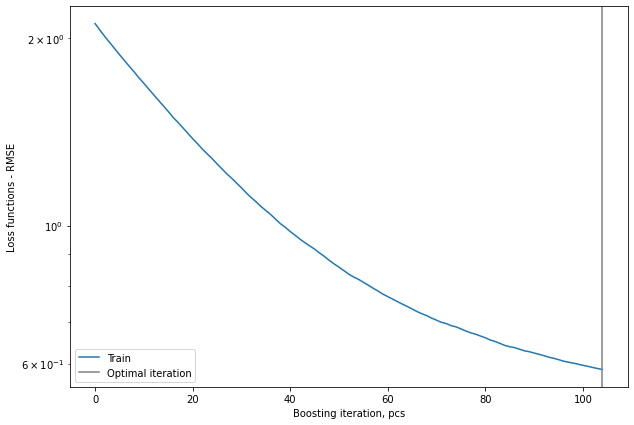

In [30]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [31]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [32]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.1
Relative bias(%):  -5.17
RMSE: 0.6
Relative RMSE(%):  0.238
MSE: 0.3
R square: 57.5%


In [33]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.282
a1: 0.430
R^2: 0.695
Uncertainty
a0: 1.28+/-0.07
a1: 0.430+/-0.028


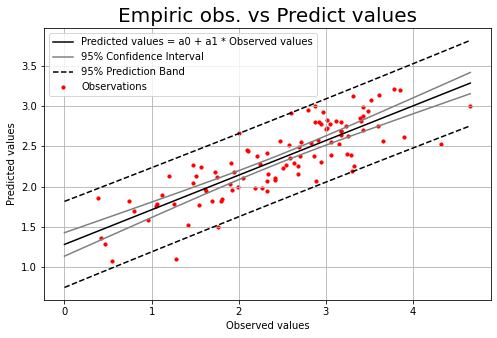

In [34]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

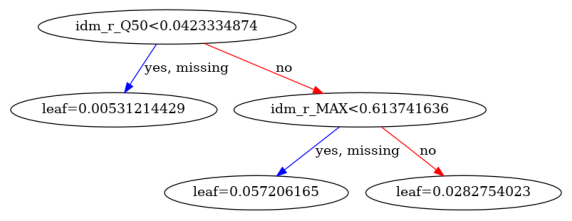

In [38]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

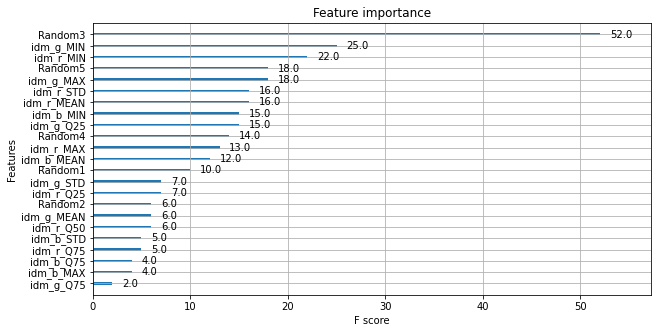

In [40]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

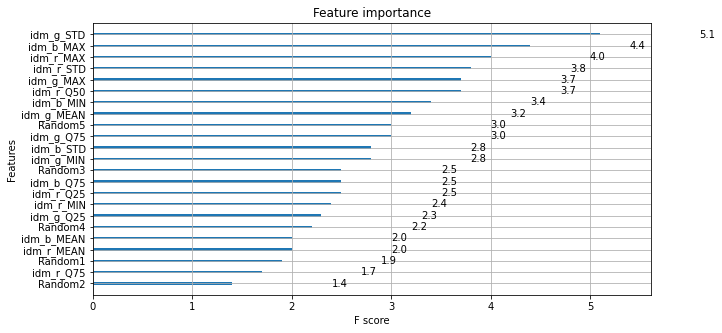

In [41]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

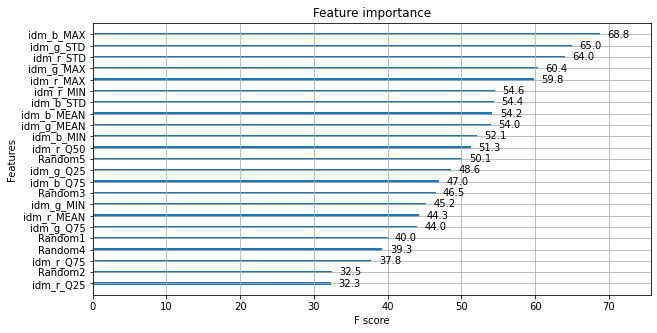

In [42]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [43]:
# Load SHAP`s library
import shap

In [44]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


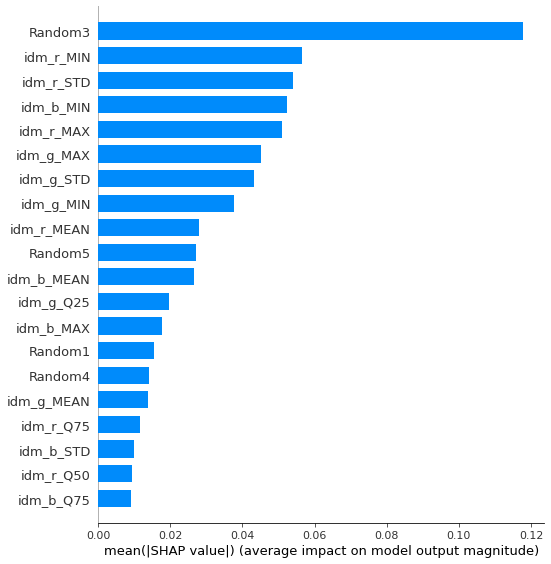

In [45]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

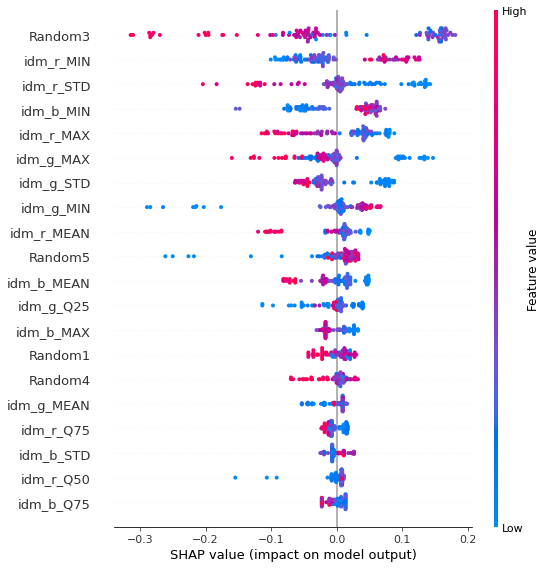

In [46]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

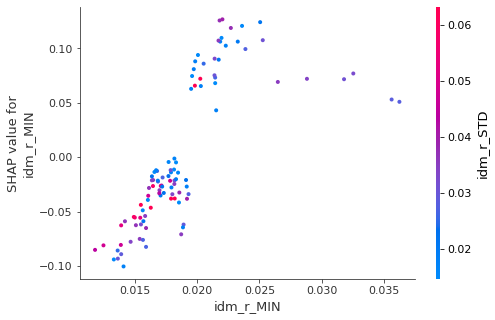

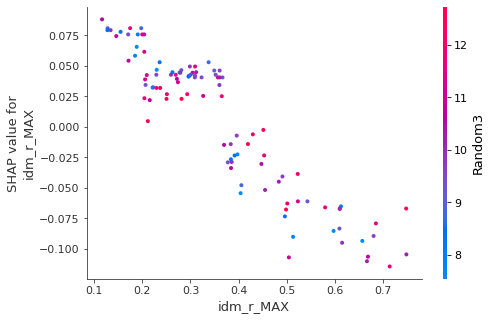

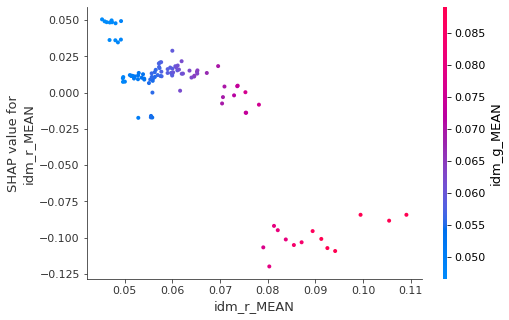

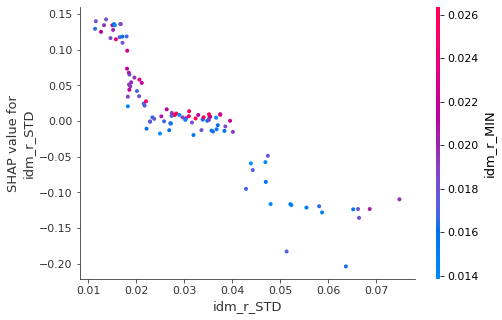

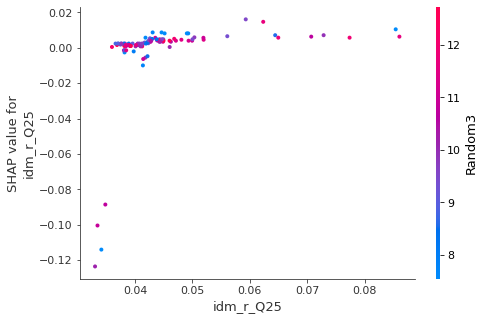

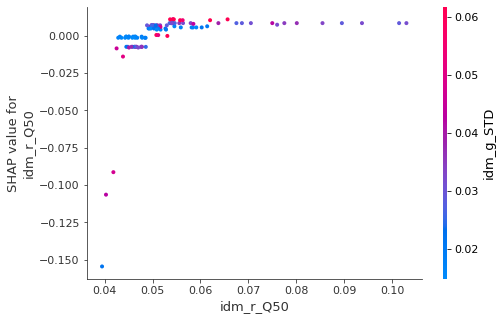

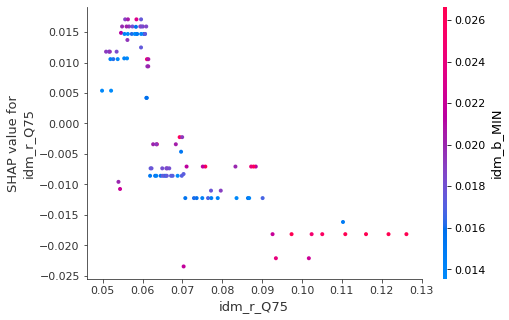

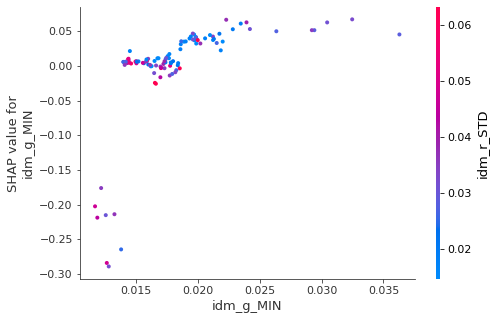

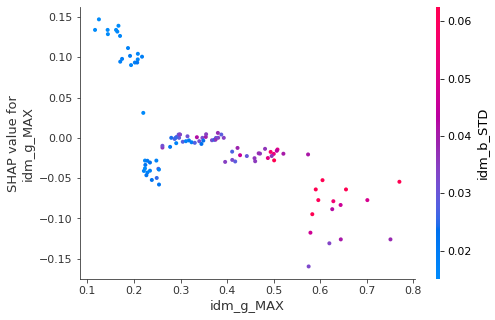

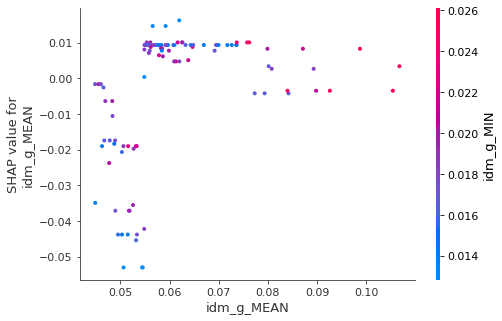

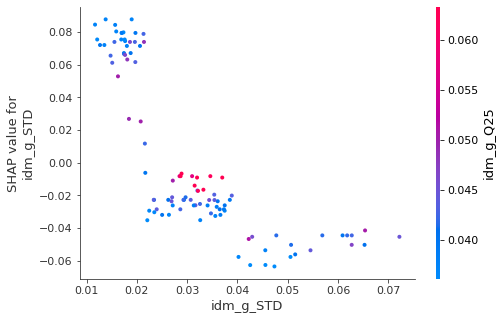

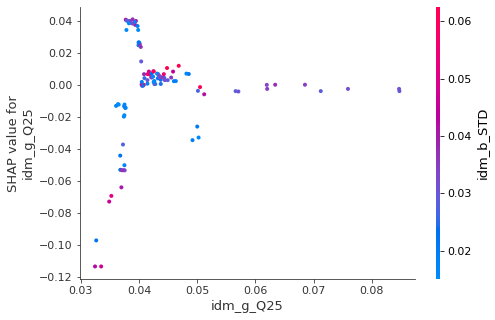

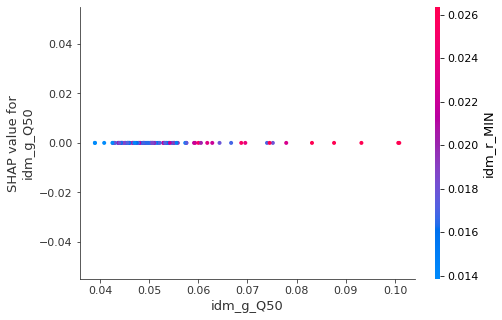

invalid value encountered in true_divide
invalid value encountered in true_divide


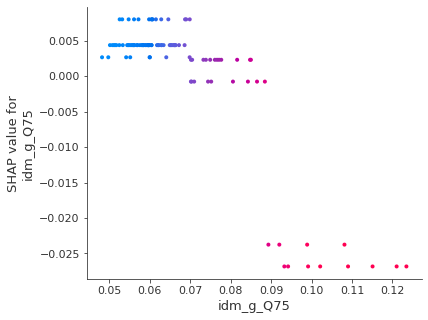

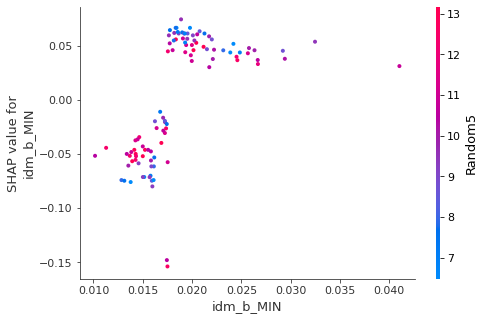

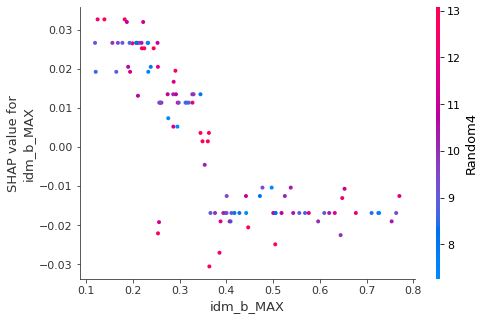

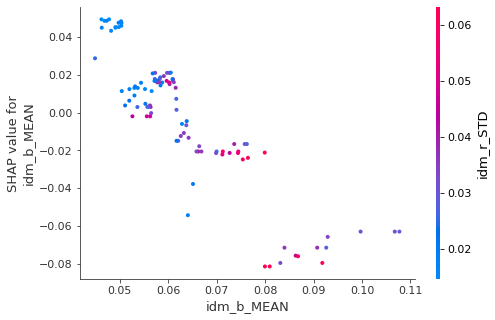

invalid value encountered in true_divide
invalid value encountered in true_divide


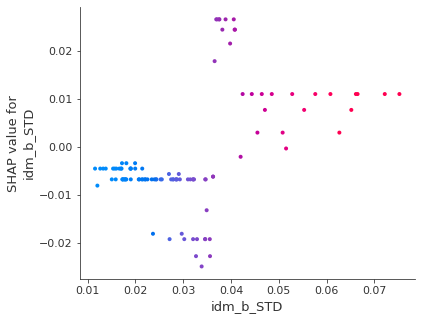

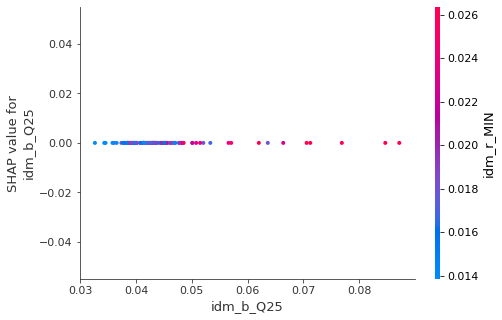

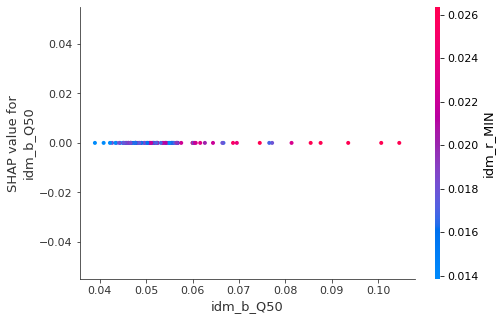

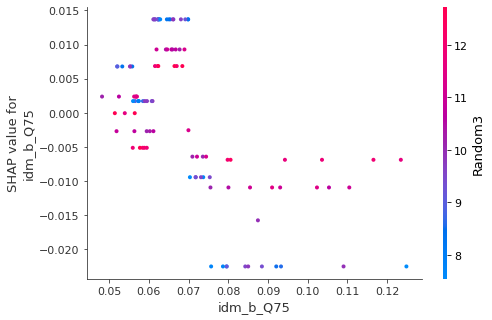

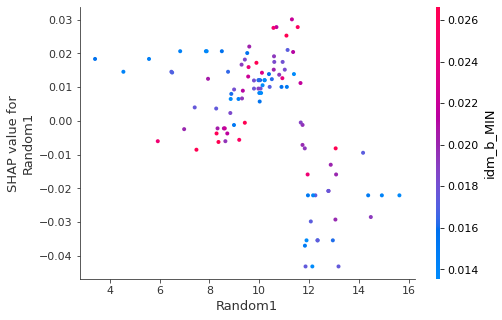

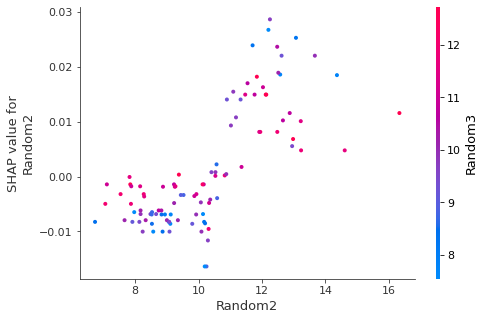

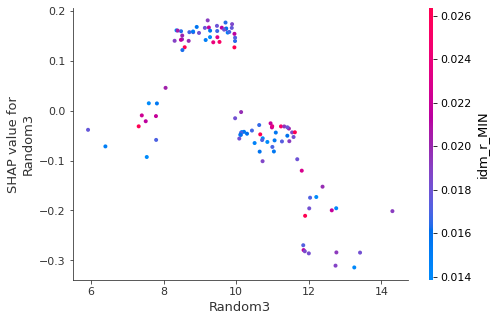

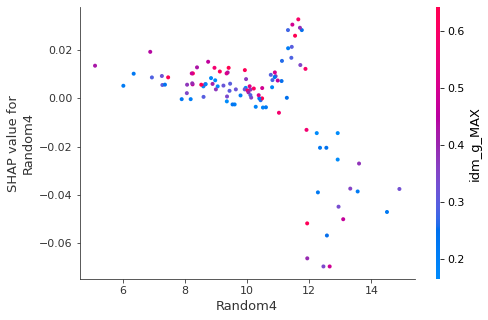

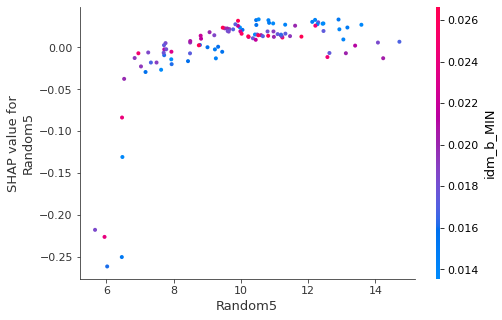

In [47]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_St_XGB_model_.txt")